In [ ]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
matplotlib.use("Agg")
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout ,Flatten,Dense,Input,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [ ]:
 baseModel = InceptionV3(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
train_path='/content/drive/MyDrive/senario1_224/train'
valid_path='/content/drive/MyDrive/senario1_224/valid'
test_path='/content/drive/MyDrive/senario1_224/test'
testC_path='/content/drive/MyDrive/senario1_224/testC'
testC2_path='/content/drive/MyDrive/senario2_224/testC'
IMAGE_SIZE = [224, 224]

In [ ]:
'''
imname='/content/drive/MyDrive/s1_suez_jpg2/20141109.jpg'
Image(filename=imname)
preprocessed_image = prepare_image(imname)
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results
'''

"\nimname='/content/drive/MyDrive/s1_suez_jpg2/20141109.jpg'\nImage(filename=imname)\npreprocessed_image = prepare_image(imname)\npredictions = mobile.predict(preprocessed_image)\nresults = imagenet_utils.decode_predictions(predictions)\nresults\n"

In [ ]:
baseModel = InceptionV3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
#headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
#headModel = Dense(16, activation="relu")(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the training process
for layer in baseModel.layers:
	layer.trainable = False

In [ ]:
model.summary()    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
______________________________________________________________________________________________

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                   #rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip= True,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode="nearest"
                                   ) #included in our dependencies

trainGen=train_datagen.flow_from_directory(train_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True)

valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                  #rescale = 1./255
                                 )
valGen=valid_datagen.flow_from_directory(valid_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                  class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle=True)

validC_generator=valid_datagen.flow_from_directory(valid_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                  class_mode='categorical',
                                                 batch_size=8,
                                                 shuffle= False)

test_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                                #rescale = 1./255
                                )

test_generator=test_datagen.flow_from_directory(test_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                                 batch_size=8,
                                                 shuffle=True)

testC_generator=test_datagen.flow_from_directory(testC_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                         
                                                 batch_size=8,
                                                 shuffle= False
                                                 )
testC2_generator=test_datagen.flow_from_directory(testC2_path,
                                                 target_size=IMAGE_SIZE,
                                                 color_mode='rgb',
                                         
                                                 batch_size=8,
                                                 shuffle= False
                                                 )

Found 113 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 13 images belonging to 1 classes.
Found 13 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
# train the model

r = model.fit(
	trainGen,
	steps_per_epoch=8,
	validation_data=valGen,
	validation_steps=4,
	epochs=50)

Epoch 1/50
8/8 [==============================] - 9s 377ms/step - loss: 4.0443 - accuracy: 0.5916 - val_loss: 1.8988 - val_accuracy: 0.8462
Epoch 2/50
8/8 [==============================] - 1s 121ms/step - loss: 2.7648 - accuracy: 0.8067 - val_loss: 17.1510 - val_accuracy: 0.2692
Epoch 3/50
8/8 [==============================] - 1s 134ms/step - loss: 2.5923 - accuracy: 0.7702 - val_loss: 1.0000 - val_accuracy: 0.9231
Epoch 4/50
8/8 [==============================] - 1s 123ms/step - loss: 3.3405 - accuracy: 0.9179 - val_loss: 11.4928 - val_accuracy: 0.4231
Epoch 5/50
8/8 [==============================] - 1s 125ms/step - loss: 1.2988 - accuracy: 0.8999 - val_loss: 21.6792 - val_accuracy: 0.3077
Epoch 6/50
8/8 [==============================] - 1s 134ms/step - loss: 0.4991 - accuracy: 0.9430 - val_loss: 5.2369 - val_accuracy: 0.6538
Epoch 7/50
8/8 [==============================] - 1s 135ms/step - loss: 1.0866 - accuracy: 0.9327 - val_loss: 1.4296 - val_accuracy: 0.7692
Epoch 8/50
8/8 [=

In [ ]:
model.evaluate(trainGen)
model.evaluate(valGen)
model.evaluate(testC2_generator)

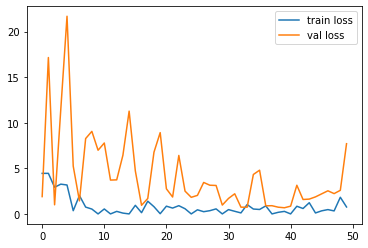

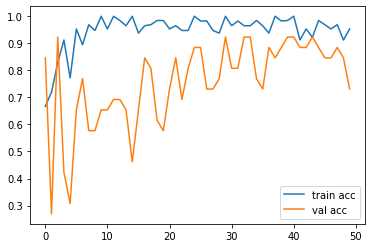

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from keras.models import load_model
modelsavedir='/content/drive/MyDrive/senario1_model/'
modelname='spill_newins3_model.h5'
model.save(modelsavedir+modelname)
#np.save(modelsavedir+'good3_insp.npy',r.history


from tensorflow.keras.models import load_model
new_model = load_model(modelsavedir+modelname)

In [ ]:
import sklearn.metrics as metrics
probabilities = new_model.predict(testC2_generator)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = testC2_generator.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC2_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   

In [ ]:
import sklearn.metrics as metrics
probabilities = new_model.predict(testC_generator)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = testC_generator.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(testC_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

In [ ]:
probabilities = new_model.predict(validC_generator)
probabilities
predicted_classes=np.argmax(probabilities, axis=1)
print('predited\n',predicted_classes)
true_classes = validC_generator.classes
print('True\n',true_classes)
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)  # shape=(12, 12)
print(confusion_matrix)
class_labels = list(validC_generator.class_indices.keys()) 
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

In [ ]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224,224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [ ]:

#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = '/content/drive/MyDrive/s1_suez_jpg2/20180715.jpg'
new_image = load_image(img_path)
pred = model.predict(new_image)
pred